In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib,pprint,keras

import FBNN2d,sei_kume,myResNet
importlib.reload(FBNN2d)
importlib.reload(sei_kume)
importlib.reload(myResNet)
from FBNN2d import *
from sei_kume import *
from myResNet import *

th[0]=1で固定した方が良さそう
->そもそも固有値がゼロという結果が不自然

eig[0]=1+LReLU
Test loss, Test mae: 24.560651, 3.494049
logLdiff: 1.068344246338502
eig[0]=1+ReLU


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test loss, Test mae: 25.185696, 3.551038
logLdiff: 1.1019962384793378


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


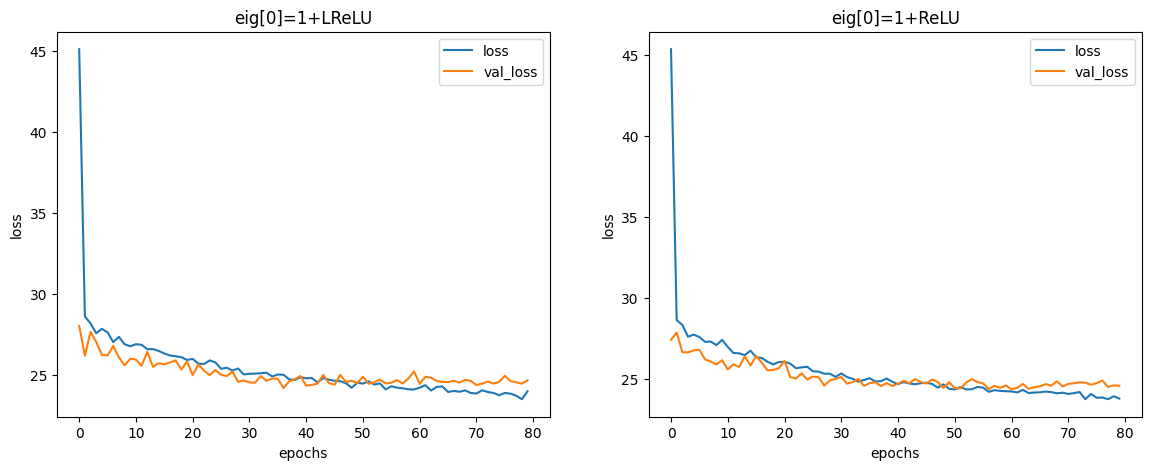

In [5]:
(x_train,y_train) = gene_data_one(hist_gene,Sig_lim=20,mu_lim=20,gene_size=3000,multi=1000,center=None)
test_data         = [gene_data_one(hist_gene,Sig_lim=20,mu_lim=20,gene_size=20,multi=1000,center=None) for _ in range(10)]

model1 = set_model_LeakyReLU(n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)
model2 = set_model(n_hidden=400,n_layer=5,print_summary=False)

fig, axes = plt.subplots(ncols=2,figsize=(14, 5))
titles=["+LReLU","+ReLU"]
for i,model in enumerate([model1,model2]):
    print("eig[0]=1"+titles[i])
    history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                        epochs=80, validation_split=0.2, shuffle=True
                        # batch_size=30,validation_data=(x_test, y_test)
                        )

    scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
    score = np.mean(scores,axis=0)
    print("Test loss, Test mae: %f, %f" % (score[0], score[1]))

    res=[]
    for (x_test,y_test) in test_data:
        res.append( comp_logL_Sigmu(model,x_test,y_test)["T-0"] )
    print("logLdiff:",np.mean(res))
    model.save("./models/mymodel_1start%d.h5"%(i+1), include_optimizer=False)

    df1 = pd.DataFrame(history.history)[['loss', 'val_loss']]
    df1.plot(ax=axes[i],xlabel="epochs",ylabel="loss",title="eig[0]=1"+titles[i])

plt.show()

Test loss, Test mae: 20.325233, 2.987611
logLdiff: 1.1534249676642208


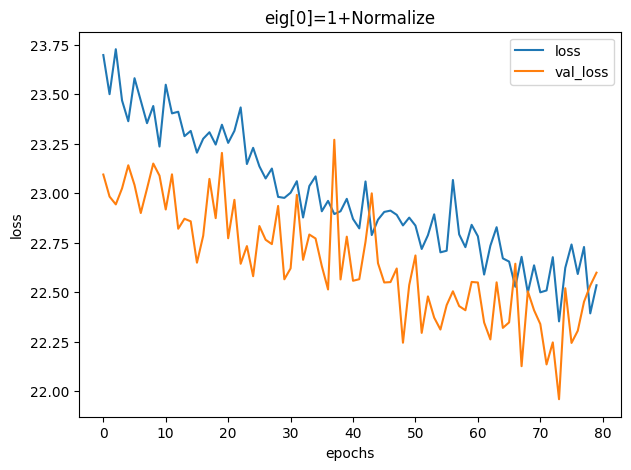

In [7]:
(x_train,y_train) = gene_data_one(hist_gene,Sig_lim=20,mu_lim=20,gene_size=3000,multi=1000,center=np.pi)
test_data         = [gene_data_one(hist_gene,Sig_lim=20,mu_lim=20,gene_size=20,multi=1000,center=np.pi) for _ in range(10)]

model1 = set_model_LeakyReLU(n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)

fig, axes = plt.subplots(figsize=(7, 5))

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )

scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))

res=[]
for (x_test,y_test) in test_data:
    res.append( comp_logL_Sigmu(model,x_test,y_test)["T-0"] )
print("logLdiff:",np.mean(res))
# model.save("./models/mymodel_1start%d.h5"%(i+1), include_optimizer=False)

df = pd.DataFrame(history.history)[['loss', 'val_loss']]
df.plot(ax=axes,xlabel="epochs",ylabel="loss",title="eig[0]=1+Normalize")

plt.show()

th[0]=1なので、eig[0]=2

Test loss, Test mae: 18.974899, 3.126287
logLdiff: 1.282008800214987


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


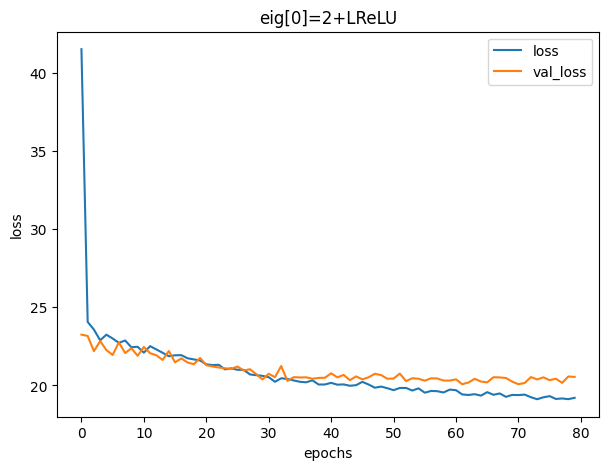

In [4]:
(x_train,y_train) = gene_data_one(hist_gene,eig0=2,Sig_lim=20,mu_lim=20,gene_size=3000,multi=1000,center=None)
test_data         = [gene_data_one(hist_gene,eig0=2,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=None) for _ in range(10)]

model = set_model_LeakyReLU(n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)

fig, axes = plt.subplots(figsize=(7, 5))

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )

scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))

res=[]
for (x_test,y_test) in test_data:
    res.append( comp_logL_Sigmu(model,x_test,y_test)["T-0"] )
print("logLdiff:",np.mean(res))
model.save("./models/mymodel_1start3.h5", include_optimizer=False)

df1 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df1.plot(ax=axes,xlabel="epochs",ylabel="loss",title="eig[0]=2+LReLU")

plt.show()

Test loss, Test mae: 18.233667, 3.010806
logLdiff: 0.768216843928769


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


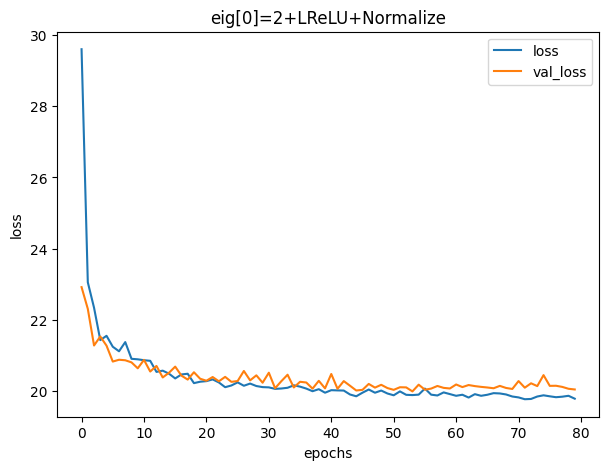

In [3]:
(x_train,y_train) = gene_data_one(hist_gene,eig0=2,Sig_lim=20,mu_lim=20,gene_size=3000,multi=1000,center=np.pi)
test_data         = [gene_data_one(hist_gene,eig0=2,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=np.pi) for _ in range(10)]

model = set_model_LeakyReLU(n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)

fig, axes = plt.subplots(figsize=(7, 5))

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )

scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))

res=[]
for (x_test,y_test) in test_data:
    res.append( comp_logL_Sigmu(model,x_test,y_test)["T-0"] )
print("logLdiff:",np.mean(res))
model.save("./models/mymodel_1start%d.h5"%4, include_optimizer=False)

df1 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df1.plot(ax=axes,xlabel="epochs",ylabel="loss",title="eig[0]=2+LReLU+Normalize")

plt.show()

th[0]=1で固定して、thgaでモデル構築

Test loss, Test mae: 17.956431, 3.438736
logLdiff: 18.963436293600992


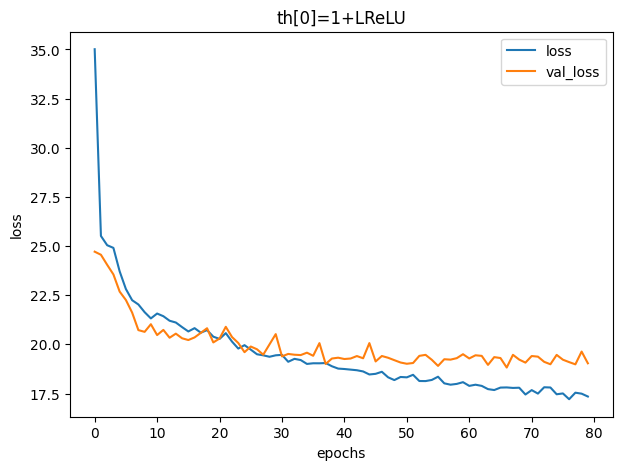

In [29]:
(x_train,y_train) = gene_data_one_thga(hist_gene_thga2,t0=1,Sig_lim=20,mu_lim=20,gene_size=3000,multi=1000)
test_data         = [gene_data_one_thga(hist_gene_thga2,t0=1,Sig_lim=20,mu_lim=20,gene_size=20,multi=1000) for _ in range(10)]

model = set_model_zero_LeakyReLU(output_shape=4,n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )

scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))

res=[]
for (x_test,y_test) in test_data:
    res.append( comp_logL_Sigmu(model,x_test,y_test,t0=1)["T-0"] )
print("logLdiff:",np.mean(res))
# model.save("./models/mymodel_1start%d.h5"%(i+1), include_optimizer=False)

fig, axes = plt.subplots(figsize=(7, 5))
df1 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df1.plot(ax=axes,xlabel="epochs",ylabel="loss",title="th[0]=1+LReLU")

plt.show()